Made it a handful of short texts so that you can see how to put CountVectorizer to full use in your applications. Keep note that each title above is considered a document.

In [12]:
cat_in_the_hat_docs=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector=cv.fit_transform(cat_in_the_hat_docs)

What happens above is that the 5 books titles are preprocessed, tokenized and represented as a sparse matrix as explained in the introduction. By default, CountVectorizer does the following:

lowercases your text (set lowercase=false if you don’t want lowercasing)
uses utf-8 encoding
performs tokenization (converts raw text to smaller units of text)
uses word level tokenization (meaning each word is treated as a separate token)
ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)
Now, let’s look at the vocabulary (collection of unique words from our documents):

In [14]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

# cv.vocabulary_ typically refers to the vocabulary or set of unique words that a CountVectorizer (cv) has learned from a 
# given text corpus.
# cv.vocabulary_ to retrieve a dictionary where keys are words, and values are the corresponding indices in the feature matrix. 

{'one': 28,
 'cent': 8,
 'two': 40,
 'cents': 9,
 'old': 26,
 'new': 23,
 'all': 1,
 'about': 0,
 'money': 22,
 'cat': 7,
 'in': 16,
 'the': 37,
 'hat': 13,
 'learning': 19,
 'library': 20,
 'inside': 18,
 'your': 42,
 'outside': 30,
 'human': 15,
 'body': 4,
 'oh': 25,
 'things': 39,
 'you': 41,
 'can': 6,
 'do': 10,
 'that': 36,
 'are': 2,
 'good': 12,
 'for': 11,
 'staying': 34,
 'healthy': 14,
 'on': 27,
 'beyond': 3,
 'bugs': 5,
 'insects': 17,
 'there': 38,
 'no': 24,
 'place': 31,
 'like': 21,
 'space': 33,
 'our': 29,
 'solar': 32,
 'system': 35}

In [15]:
#shape of count vector: 5 docs (book titles) and 43 unique words
count_vector.shape

(5, 43)

In [17]:
cv = CountVectorizer(stop_words=["all","in","the","is","and"]) # we provide a list of stop words
count_vector=cv.fit_transform(cat_in_the_hat_docs)
count_vector.shape

(5, 40)

In this example, we provide a list of words that act as our stop words. Notice that the shape has gone from (5,43) to (5,40) because of the stop words that were removed. Note that we can actually load stop words directly from a file into a list and supply that as the stop word list.

In [7]:
# any stop words that we explicitly specified? stop words listed above
cv.stop_words

['all', 'in', 'the', 'is', 'and']

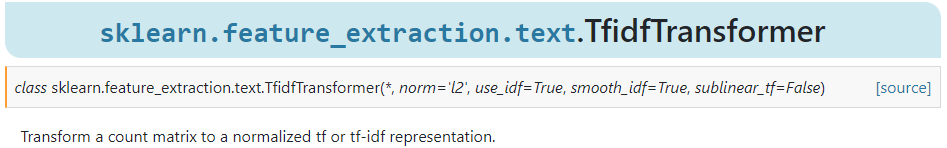

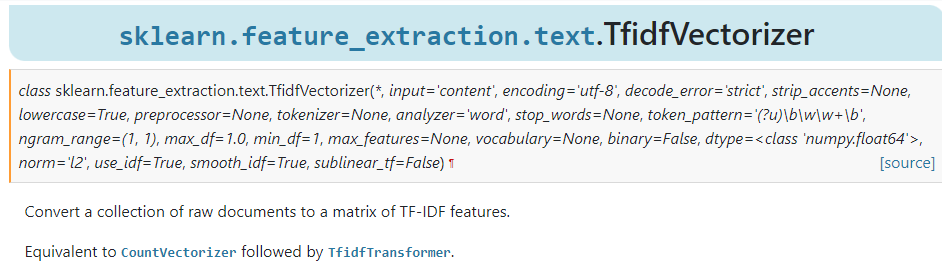

#### Tfidftransformer and Tfidfvectorizer

This are the classes which calculates tfidf scores for the documents.

There is only little difference between both of them
Tfidftransformer uses CountVectorizer that we have created manually

But Tfidvectorizer performs CountVectorizer function internally and no need to create
manual CountVectorizer object.

In [21]:
import pandas as pd

import pandas as pd#using Tfidtrasnformer
from sklearn.feature_extraction.text import TfidfTransformer # transformer not vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#we will use this toy example
docs=["the house had a tiny little mouse",
      "the cat saw the mouse",
      "the mouse ran away from the house",
      "the cat finally ate the mouse",
      "the end of the mouse story"
     ]

cv = CountVectorizer(max_df=0.5) # 1

count_vector = cv.fit_transform(docs)
print(count_vector.shape)

#calculate idf values
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True) # 2
tfidf_transformer.fit(count_vector)

(5, 14)


TfidfTransformer()

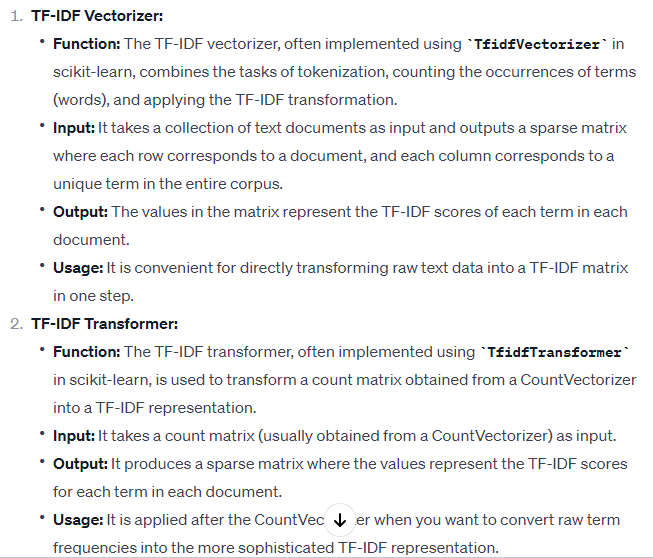

In [24]:
# tfidf_transformer.idf_: This attribute of the TF-IDF transformer contains the IDF values for each term in the vocabulary. 
# IDF is a measure of how important a term is in a collection of documents.

# It is calculated as the logarithmically scaled inverse fraction of the documents that contain the term. Terms with
# higher IDF values are considered more important.

df_idf = pd.DataFrame(tfidf_transformer.idf_,index=cv.get_feature_names(),columns=["idf_weights"])
df_idf

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
ate,2.098612
away,2.098612
cat,1.693147
end,2.098612
finally,2.098612
from,2.098612
had,2.098612
house,1.693147
little,2.098612
of,2.098612


In [25]:
# using tfid_vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(smooth_idf=True,use_idf=True)
tfidf_vectorizer.fit_transform(docs)

#as you can see we don't need CountVectorizer in TfidfVectorizer

df_idf = pd.DataFrame(tfidf_vectorizer.idf_,index=tfidf_vectorizer.get_feature_names(),columns=["idf_weights"])
df_idf

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
ate,2.098612
away,2.098612
cat,1.693147
end,2.098612
finally,2.098612
from,2.098612
had,2.098612
house,1.693147
little,2.098612
mouse,1.000000


### LogisticRegression Model

In [26]:
# we can also pass countvectorizer parameters in TfidVectorizer
tfv = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',
                      ngram_range=(1,3),use_idf=1,smooth_idf=1,stop_words='english')

# max_features confines maximum number of words 

tfv.fit(list(X_train) + list(X_test))
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

# Fitting Logistic Regression on TFIDF
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0)
clf.fit(X_train_tfv,y_train)
prediction = clf.predict_proba(X_test_tfv)

print("logloss: %0.3f" % multiclass_logloss(y_test,prediction))

NameError: name 'X_train' is not defined

In [11]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

ctv.fit(list(X_train)+list(X_test))
X_train_ctv = ctv.transform(X_train)
X_test_ctv = ctv.transform(X_test)

clf = LogisticRegression(C=1.0)
clf.fit(X_train_ctv,y_train)
prediction = clf.predict_proba(X_test_ctv)

print("logloss: %0.3f" % multiclass_logloss(y_test,prediction))

NameError: name 'X_train' is not defined

### Naive Bayes
### xgboost

In [12]:
clf = xgb.XGBClassifier(max_depth=7,n_estimators=200,colsample_bytree=0.8,subsample=0.8,nthread=10,learning_rate=0.1)

clf.fit(X_train_tfv.tocsc(),y_train)
prediction = clf.predict_proba(X_test_tfv.tocsc())

print("logloss: %0.3f" % multiclass_logloss(y_test,prediction))

NameError: name 'xgb' is not defined

In [13]:
clf = xgb.XGBClassifier(max_depth=7,n_estimators=200,colsample_bytree=0.8,subsample=0.8,nthread=10,learning_rate=0.1)

clf.fit(X_train_svd,y_train)
prediction = clf.predict_proba(X_test_svd)

print("logloss: %0.3f" % multiclass_logloss(y_test,prediction))

NameError: name 'xgb' is not defined